Q.1


Linear Kernel Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



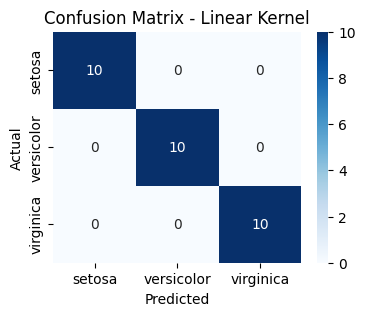


Polynomial (deg=3) Kernel Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



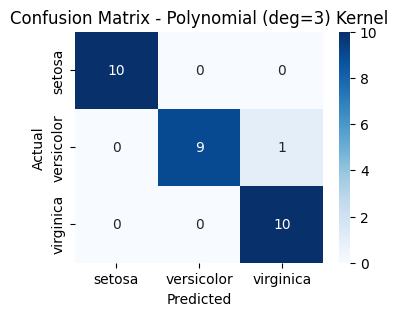


RBF Kernel Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



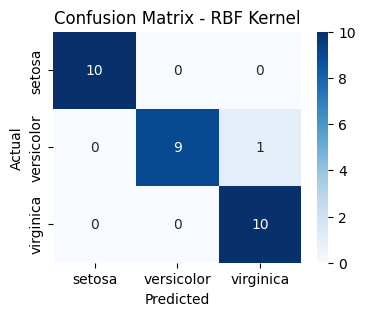


Summary of Results:
Linear: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
Polynomial (deg=3): Acc=0.9667, Prec=0.9697, Rec=0.9667, F1=0.9666
RBF: Acc=0.9667, Prec=0.9697, Rec=0.9667, F1=0.9666

Best Kernel: Linear (highest F1-score)


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step a) Load dataset and split
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step b) Train three SVM models
kernels = {
    "Linear": SVC(kernel="linear"),
    "Polynomial (deg=3)": SVC(kernel="poly", degree=3),
    "RBF": SVC(kernel="rbf")
}

results = {}

for name, model in kernels.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Step c) Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

    print(f"\n{name} Kernel Results:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Step d) Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix - {name} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step e) Identify best kernel
print("\nSummary of Results:")
for name, metrics in results.items():
    print(f"{name}: Acc={metrics['Accuracy']:.4f}, Prec={metrics['Precision']:.4f}, Rec={metrics['Recall']:.4f}, F1={metrics['F1']:.4f}")

best_kernel = max(results.items(), key=lambda x: x[1]["F1"])
print(f"\nBest Kernel: {best_kernel[0]} (highest F1-score)")

Q.2

In [2]:
from sklearn.datasets import load_breast_cancer

# Step a) Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step b) Train SVM with RBF kernel (without scaling)
svm_no_scale = SVC(kernel="rbf")
svm_no_scale.fit(X_train, y_train)
train_acc_no = svm_no_scale.score(X_train, y_train)
test_acc_no = svm_no_scale.score(X_test, y_test)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel="rbf")
svm_scaled.fit(X_train_scaled, y_train)
train_acc_scaled = svm_scaled.score(X_train_scaled, y_train)
test_acc_scaled = svm_scaled.score(X_test_scaled, y_test)

# Step c) Compare results
print("\nSVM (RBF Kernel) Performance:")
print(f"Without Scaling -> Train Acc: {train_acc_no:.4f}, Test Acc: {test_acc_no:.4f}")
print(f"With Scaling    -> Train Acc: {train_acc_scaled:.4f}, Test Acc: {test_acc_scaled:.4f}")


SVM (RBF Kernel) Performance:
Without Scaling -> Train Acc: 0.9187, Test Acc: 0.9298
With Scaling    -> Train Acc: 0.9824, Test Acc: 0.9825
